In [1]:
import numpy
import torchvision

train = torchvision.datasets.FashionMNIST('fmnist', train = True, download = False)
test = torchvision.datasets.FashionMNIST('fmnist', train = False, download = False)

train_images = numpy.array([ numpy.array(item[0]) / 255 for item in train ])
train_labels = numpy.array([ item[1] for item in train ])

test_images = numpy.array([ numpy.array(item[0]) / 255 for item in test ])
test_labels = numpy.array([ item[1] for item in test ])

train_images.shape, test_images.shape

((60000, 28, 28), (10000, 28, 28))

In [3]:
import cvtda.topology
extractor = cvtda.topology.FeatureExtractor(only_get_from_dump = True, return_diagrams = False)
extractor = extractor.fit(train_images, "2/train")
train_features = extractor.transform(train_images, "2/train")
test_features = extractor.transform(test_images, "2/test")

Calculating inverted images
Got the result from ./2/train/greyscale/features.npy
Got the result from ./2/train/greyscale/features.npy
Got the result from ./2/train/inverted_greyscale/features.npy
Got the result from ./2/train/inverted_greyscale/features.npy
Fitting filtrations
Calculated radial centers for images of size 28x28: [ 4 10 17 23]x[ 4 10 17 23]
Fitting filtration 1/72: 2/HeightFiltrartion_-1_-1
Got the result from ./2/train/filtrations/2/HeightFiltrartion_-1_-1/features.npy
Fitting filtration 2/72: 2/HeightFiltrartion_1_1
Got the result from ./2/train/filtrations/2/HeightFiltrartion_1_1/features.npy
Fitting filtration 3/72: 2/HeightFiltrartion_1_-1
Got the result from ./2/train/filtrations/2/HeightFiltrartion_1_-1/features.npy
Fitting filtration 4/72: 2/HeightFiltrartion_-1_1
Got the result from ./2/train/filtrations/2/HeightFiltrartion_-1_1/features.npy
Fitting filtration 5/72: 2/HeightFiltrartion_0_-1
Got the result from ./2/train/filtrations/2/HeightFiltrartion_0_-1/featu

In [4]:
import cvtda.topology
extractor = cvtda.topology.FeatureExtractor(only_get_from_dump = True, return_diagrams = True)
extractor = extractor.fit(train_images, "2/train")
train_diagrams = extractor.transform(train_images, "2/train")
test_diagrams = extractor.transform(test_images, "2/test")

Calculating inverted images
Got the result from ./2/train/greyscale/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./2/train/greyscale/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./2/train/inverted_greyscale/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./2/train/inverted_greyscale/diagrams.npy
Applying Scaler to persistence diagrams.
Fitting filtrations
Calculated radial centers for images of size 28x28: [ 4 10 17 23]x[ 4 10 17 23]
Fitting filtration 1/72: 2/HeightFiltrartion_-1_-1
Got the result from ./2/train/filtrations/2/HeightFiltrartion_-1_-1/diagrams.npy
Applying Scaler to persistence diagrams.
Fitting filtration 2/72: 2/HeightFiltrartion_1_1
Got the result from ./2/train/filtrations/2/HeightFiltrartion_1_1/diagrams.npy
Applying Scaler to persistence diagrams.
Fitting filtration 3/72: 2/HeightFiltrartion_1_-1
Got the result from ./2/train/filtrations/2/HeightFiltrartion_1_-1/diagrams.npy
Applyi

Trying KNeighborsClassifier - KNeighborsClassifier(n_jobs=-1, n_neighbors=50)
Got the result from ./2/predictions/KNeighborsClassifier.npy
{'classifier': 'Метод k ближайших соседей', 'Accuracy': 0.7268, 'AUC-ROC': 0.9637353833333331, 'Precision': 0.7342319468359635, 'Recall': 0.7268000000000001, 'F1-score': 0.7274996397019768, 'TOP-2 Accuracy': 0.8794, 'TOP-3 Accuracy': 0.9454, 'TOP-5 Accuracy': 0.9855, 'TOP-7 Accuracy': 0.9952, 'TOP-9 Accuracy': 0.9987}
Trying RandomForestClassifier - RandomForestClassifier(n_jobs=-1, random_state=42)
Got the result from ./2/predictions/RandomForestClassifier.npy
{'classifier': 'Случайный лес', 'Accuracy': 0.8749, 'AUC-ROC': 0.9889824722222224, 'Precision': 0.8736269964809757, 'Recall': 0.8748999999999999, 'F1-score': 0.8737008141675787, 'TOP-2 Accuracy': 0.9616, 'TOP-3 Accuracy': 0.9845, 'TOP-5 Accuracy': 0.9966, 'TOP-7 Accuracy': 0.9991, 'TOP-9 Accuracy': 0.9996}
Trying HistGradientBoostingClassifier - HistGradientBoostingClassifier(max_depth=4, max

,classifier,Accuracy,AUC-ROC,Precision,Recall,F1-score,TOP-2 Accuracy,TOP-3 Accuracy,TOP-5 Accuracy,TOP-7 Accuracy,TOP-9 Accuracy
0,Метод k ближайших соседей,0.7268,0.963735,0.734232,0.7268,0.727500,0.8794,0.9454,0.9855,0.9952,0.9987
1,Случайный лес,0.8749,0.988982,0.873627,0.8749,0.873701,0.9616,0.9845,0.9966,0.9991,0.9996
2,Град. бустинг на основе гистограм,0.8589,0.986313,0.856997,0.8589,0.857173,0.9539,0.9842,0.9968,0.9996,0.9999
3,CatBoost,0.8924,0.991902,0.892116,0.8924,0.892113,0.9725,0.9911,0.9983,0.9998,1.0000
4,XGBoost,0.8758,0.989712,0.875319,0.8758,0.875374,0.9636,0.9874,0.9973,0.9998,1.0000
5,Нейронная сеть для тополог. признаков,0.8997,0.992281,0.900604,0.8997,0.900077,0.9727,0.9903,0.9982,0.9994,0.9999
6,Обучаемая векторизация диаграмм,0.8371,0.982435,0.836179,0.8371,0.836157,0.9428,0.9793,0.9969,0.9999,1.0000
7,ResNet50 – базовая модель,0.9038,0.992908,0.903700,0.9038,0.903715,0.9725,0.9899,0.9980,0.9999,1.0000
8,Комбинированная нейронная сеть,0.9149,0.990887,0.914760,0.9149,0.914756,0.9699,0.9863,0.9957,0.9991,0.9999


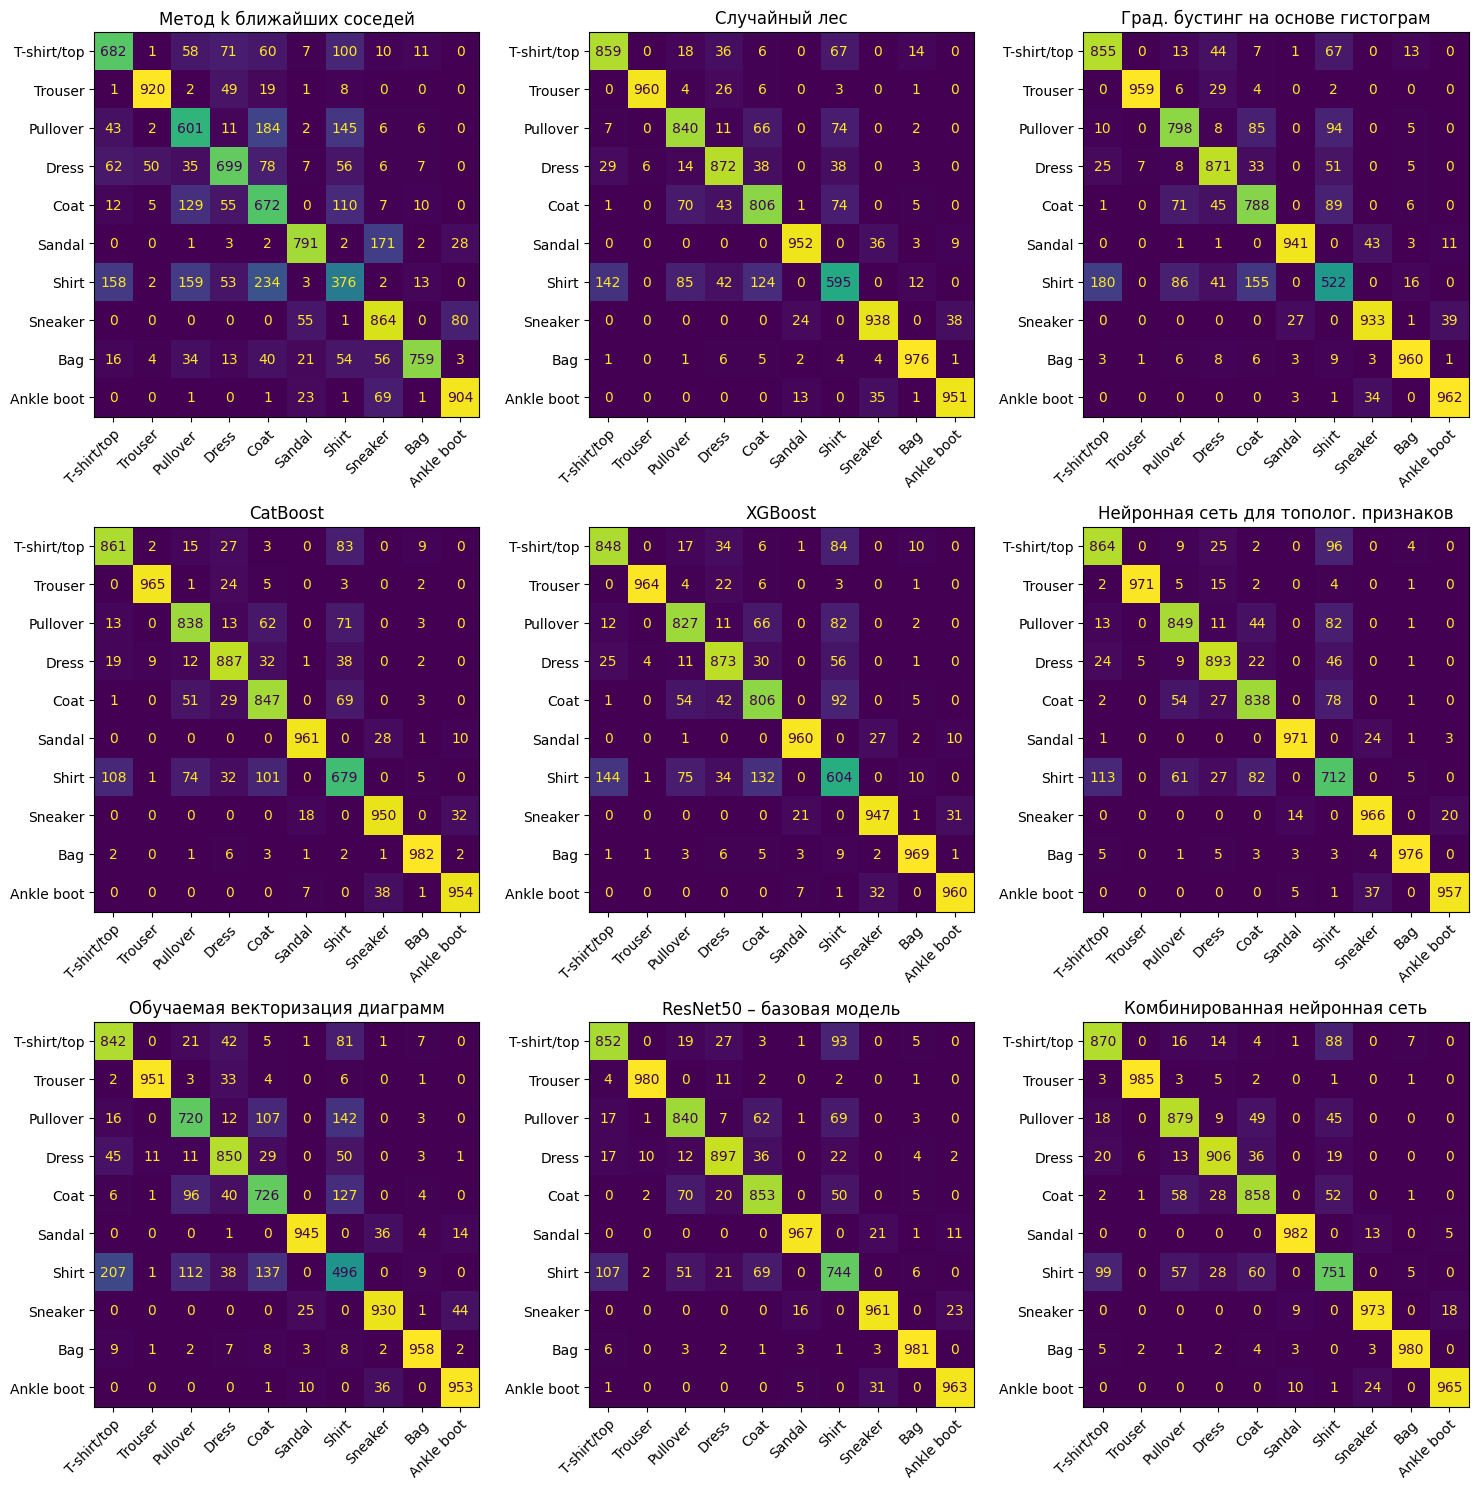

In [ ]:
import cvtda.classification

cvtda.classification.classify(
    train_images, train_features, train_labels, train_diagrams,
    test_images, test_features, test_labels, test_diagrams,
    label_names = train.classes, dump_name = "2/predictions",
    only_get_from_dump = True
)

In [1]:
import numpy
import torchvision

test = torchvision.datasets.FashionMNIST('fmnist', train = False, download = False)

test_images = numpy.array([ numpy.array(item[0]) / 255 for item in test ])
test_labels = numpy.array([ item[1] for item in test ])

In [5]:
test.class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

(10000,)

In [3]:
predictions = numpy.argmax(numpy.load("2/predictions/NNClassifier_features_images.npy"), axis = 1)
part1 = numpy.where((predictions != test_labels) & numpy.isin(predictions, [ 0, 2, 4, 6 ]) & numpy.isin(test_labels, [ 0, 2, 4, 6 ]))[0]
print(part1)
len(part1)

[  25   40   49   66   98  117  127  166  227  244  248  252  324  325
  332  344  361  374  381  382  444  452  454  476  488  491  512  525
  541  572  577  595  634  639  664  716  732  737  760  805  881  893
  910  921  965  966  977  994 1000 1005 1025 1101 1129 1130 1139 1142
 1162 1165 1194 1197 1218 1259 1261 1277 1280 1294 1305 1315 1329 1352
 1377 1387 1388 1408 1425 1449 1462 1469 1487 1495 1509 1515 1533 1559
 1561 1572 1602 1606 1620 1643 1650 1686 1731 1736 1743 1763 1771 1836
 1867 1905 1921 1943 1964 2042 2064 2067 2086 2089 2106 2144 2191 2195
 2218 2252 2269 2278 2293 2298 2326 2337 2374 2425 2431 2462 2469 2506
 2509 2532 2540 2551 2578 2580 2588 2589 2593 2617 2628 2629 2641 2652
 2653 2671 2684 2713 2732 2746 2757 2764 2806 2828 2832 2837 2839 2842
 2843 2856 2869 2908 2919 2920 2942 2953 2956 2985 2986 3026 3036 3040
 3080 3116 3132 3174 3176 3181 3187 3198 3232 3240 3269 3284 3323 3327
 3338 3370 3401 3481 3486 3488 3491 3496 3532 3537 3540 3552 3553 3554
 3568 

548

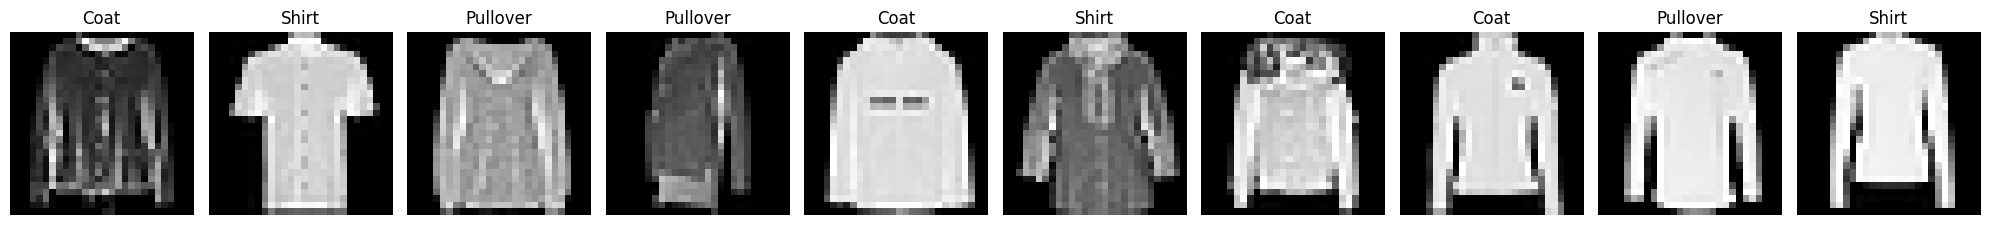

In [7]:

import matplotlib.pyplot as plt
figure, axes = plt.subplots(1, 10, figsize = (20, 2.5))

for i in range(10):
    axes[i].imshow(test_images[part1[i]], cmap = "gray")
    axes[i].set_title(test.classes[test_labels[part1[i]]])
    axes[i].axis(False)

figure.tight_layout()

plt.savefig("2/predictions/error_examples.svg")
plt.savefig("2/predictions/error_examples.png")